In [1]:
import rdflib
from rdflib import Namespace , Literal , URIRef
from rdflib.namespace import RDF , RDFS
import csv

# bind the uncommon namespaces
wd = Namespace("http://www.wikidata.org/entity/") # remember that a prefix matches a URI until the last slash (or hashtag #)
wdt = Namespace("http://www.wikidata.org/prop/direct/")
art = Namespace("https://w3id.org/artchives/")


# create an empty Graph
g = rdflib.ConjunctiveGraph()


# parse a local RDF file by specifying the format
result = g.parse("artchives.nq", format='nquads')


    
query_result = g.query("""
    PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
    PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
    PREFIX wd: <http://www.wikidata.org/entity/>
    PREFIX wdt: <http://www.wikidata.org/prop/direct/>
    PREFIX art: <https://w3id.org/artchives/>
    SELECT DISTINCT ?nameCollection ?periodLabel
    WHERE {
        ?collection wdt:P170 ?artHistorian ;
                    rdfs:label ?nameCollection ;
                    art:hasSubjectPeriod ?period .
        ?period rdfs:label ?periodLabel
    }
    GROUP BY ?nameCollection ?periodLabel
    """)

with open('collections_periods.csv', 'wt') as out_file:
    csv_writer = csv.writer(out_file, delimiter=';', quotechar='"', quoting=csv.QUOTE_ALL)
    csv_writer.writerow(['Collection', 'Period'])
    for row in query_result:
        csv_writer.writerow([row.nameCollection.strip(), row.periodLabel.strip()]) #se metto row.name mi da i nomi dei paesi, ma non leva i doppioni
        
import pandas as pd
data = pd.read_csv('collections_periods.csv', encoding = 'Latin-1', error_bad_lines=False)
# print the first 5 rows
data.head(30)

,"Collection;""Period"""
0,"Fototeca Zeri;""Renaissance"""
1,"Fototeca Zeri;""Renaissance"""
2,"Fototeca Zeri;""Renaissance"""
3,"Fototeca Zeri;""Renaissance"""
4,"Fototeca Zeri;""Renaissance"""
5,"Fototeca Zeri;""Renaissance"""
6,"Fototeca Zeri;""Renaissance"""
7,"Fototeca Zeri;""Renaissance"""
8,"Fototeca Zeri;""Renaissance"""
9,"Fototeca Zeri;""Renaissance"""


In [2]:
import csv
import pandas as pd


with open("collections_periods.csv") as csv_file:
    df = pd.read_csv(csv_file, delimiter=';', encoding = "latin-1")
print(df.head(90))

                                           Collection        Period
0                                       Fototeca Zeri   Renaissance
1                                       Fototeca Zeri   Renaissance
2                                       Fototeca Zeri   Renaissance
3                                       Fototeca Zeri   Renaissance
4                                       Fototeca Zeri   Renaissance
..                                                ...           ...
85                          Gustav Ludwig-Vermächtnis  16th century
86  Nachlass Fritz Heinemann, Notizen zur venezian...       Baroque
87  Nachlass Fritz Heinemann, Notizen zur venezian...       Baroque
88  Nachlass Fritz Heinemann, Notizen zur venezian...       baroque
89  Nachlass Fritz Heinemann, Notizen zur venezian...       Baroque

[90 rows x 2 columns]


In [4]:

import pandas_profiling as pp
pp.ProfileReport(df.drop_duplicates('Collection', keep= 'last'))

Summarize dataset:   0%|          | 0/16 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

C:\Users\giulm\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout(*args, **kwargs)


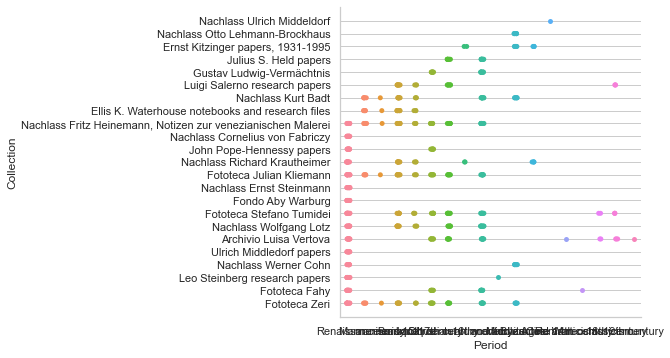

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
fig_dims = (40, 40)
ax = sns.catplot(x="Period", y="Collection", kind="strip", data=df)
#the margins are not large enough for this catplot, it is used for categorical data 